# 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=np.empty((100,2))#创建一个200*3的矩阵
X[:,0] = np.random.uniform(0.,100.,size=100)#第1列数据
X[:,1]=0.75*X[:,0]+ 3. + np.random.normal(0,10.,size=100)#第2列数据

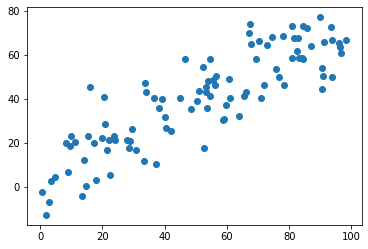

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## demean

In [4]:
def demean(X):
    #X[:,0]=X[:,0]-np.mean(X[:,0])
    #X[:,1]=X[:,1]-np.mean(X[:,1])
    print("np.mean axis=0:",np.mean(X,axis=0))
    return X - np.mean(X,axis=0)#在行从上往下的方向上求均值，相当于求出每列数的均值

np.mean axis=0: [51.79912694 40.01800584]


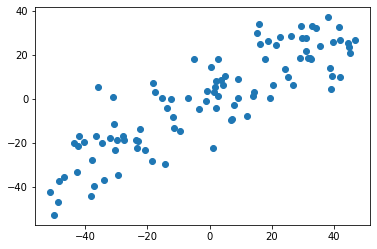

In [5]:
X_demean=demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])#经过绘图发现demean操作后的数据分布不变，但坐标轴换了
plt.show()

In [6]:
np.mean(X[:,0])

51.79912694345807

In [7]:
np.mean(X[:,1])

40.018005836482295

### 经过测试发现经过demean处理后的数据的均值确实->0

In [8]:
np.mean(X_demean[:,0])

-1.2079226507921703e-14

In [9]:
np.mean(X_demean[:,1])

-3.872457909892546e-15

## 使用梯度上升法求解主成分

In [10]:
def f(w,X):#要求传来的X需要经过demean操作了
    return np.sum((X.dot(w))**2)/X.shape[0]#样本数m
def df_math(w,X):
    return X.T.dot(X.dot(w)) * 2. / X.shape[0]

In [11]:
def df_debug(w,X,epsilon=0.0001):#近似梯度求法，且支持损失函数
    res = np.empty(len(w))#结果
    for i in range(len(w)):#对于每一个维度的导数进行计算
        w_1=w.copy()#深拷贝
        w_1[i]+=epsilon#对第i维特征增加epsilon
        w_2=w.copy()#深拷贝
        w_2[i]-=epsilon#对第i维特征较小epsilon
        res[i]=(f(w_1,X)-f(w_2,X))/(2*epsilon)#求出第i个维度的导数值
    return res

In [12]:
def direction(w):#将w转为单位向量
    return w/np.linalg.norm(w)#除以w的模因为数学推导时我们希望w为单位向量以便提高我们的计算速度
def gradient_ascent(df,X,initital_w,eta,n_iters=1e4,epsilon=1e-8):
    w=direction(initital_w)#转换为单位向量
    cur_iter=0
    
    while cur_iter<n_iters:
        gradient=df(w,X)
        last_w=w
        w=w+eta*gradient#梯度上升操作
        w=direction(w)#转换为单位向量
        if(abs(f(w,X)-f(last_w,X))<epsilon):#如果变动不大，则跳出循环
            break
        cur_iter+=1
    return w

In [13]:
initial_w=np.random.random(X.shape[1])#不能从0向量开始，因为梯度铁定为0
initial_w

array([0.62873748, 0.63740151])

In [14]:
eta=0.01

In [15]:
#注意：不能使用StandardScaler标准化数据，因为我们需要方差最大，如果用标准化，那方差就变为了1，这就不行了

In [16]:
gradient_ascent(df_debug,X_demean,initial_w,eta)#使用df_debug进行梯度求解

array([0.80366826, 0.59507758])

In [17]:
w=gradient_ascent(df_math,X_demean,initial_w,eta)#w为第一主成分使用正常数学公式进行计算，发现与debug结果一致
w

array([0.80366826, 0.59507758])

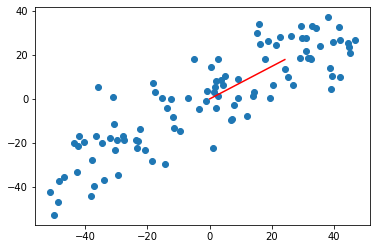

[0, 40.18341302606683] [0, 29.753879034111208]
[0, 0.8036682605213367] [0, 0.5950775806822242]
1.3505268667658


In [18]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color='r')#画w这个方向的线
plt.show()
print([0,w[0]*50],[0,w[1]*50])
print([0,w[0]],[0,w[1]])
print(w[0]/w[1])

## 用一个更加极端的数据进行测试

In [19]:
X2=np.empty((100,2))#创建一个200*3的矩阵
X2[:,0] = np.random.uniform(0.,100.,size=100)#第1列数据
X2[:,1]=0.75*X2[:,0]+ 3.

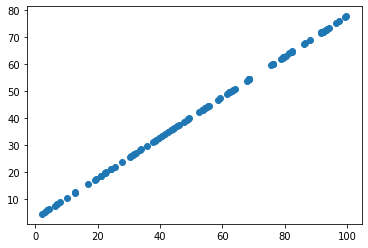

In [20]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [21]:
X2_demean=demean(X2)
initial_w2=np.random.random(X2.shape[1])

np.mean axis=0: [52.81769625 42.61327219]


In [22]:
w2=gradient_ascent(df_math,X2_demean,initial_w2,eta)
w2#w2就是那个Var最大的轴（0.6/0.8=0.75，计算结果吻合）横轴方向为0.8，纵轴方向为0.6

array([0.79999999, 0.60000002])

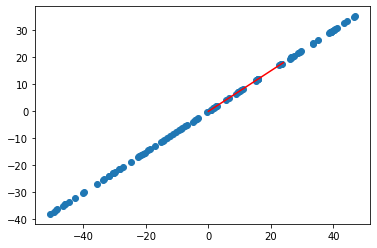

In [23]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w2[0]*30],[0,w2[1]*30],color='r')#发现这个轴和样本点重合绘制(0,0)和(w2[0]*30,w2[1]*30)两点并用线连接起来，不会可看下面例子
#plt.plot([-5,w2[0]*30],[-5,w2[1]*30],color='o')
plt.show()
plt.plot?

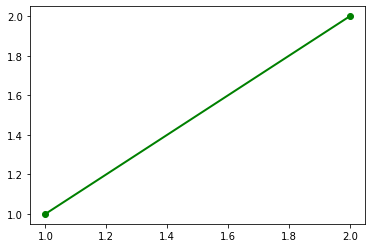

In [24]:
plt.plot([1,2], [1,2], 'go-', label='line 1', linewidth=2)
plt.show()